<a href="https://colab.research.google.com/github/ks-chauhan/digitRecognition/blob/main/digitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from tqdm.auto import tqdm
torch.manual_seed(18)
import matplotlib.pyplot as plt

In [ ]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

In [ ]:
train_dataset=torchvision.datasets.MNIST(root="/data",train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root="/data",train=False,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 50.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.62MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.92MB/s]


In [ ]:
train_dataset_dataloader=torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_dataset_dataloader=torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=True)

In [ ]:
image,label=next(iter(train_dataset_dataloader))
image[0].shape

torch.Size([1, 28, 28])

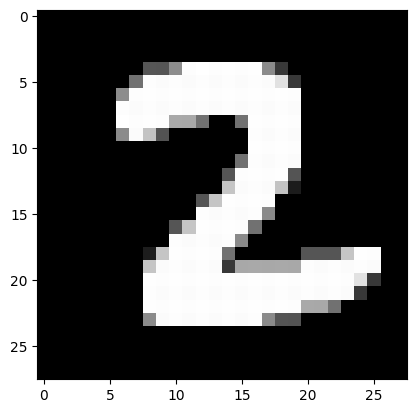

In [ ]:
plt.imshow(image[10].reshape(28,28,1),cmap="gray")

In [ ]:
digits = set()  # Using a set for unique labels

for images, labels in train_dataset_dataloader:
    digits.update(labels.numpy())  # Convert tensor to NumPy and add to set

print("Unique labels:", digits)


Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
class digitRecognitionModel(nn.Module):
  def __init__(self,
               input_size:int,
               hidden_units:int,
               output_size:int):
    super().__init__()
    self.convolutionalLayer1=nn.Sequential(
        nn.Conv2d(in_channels=input_size,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    self.convolutionalLayer2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_size)
    )
  def forward(self,x:torch.Tensor):
    x=self.convolutionalLayer1(x)
    x=self.convolutionalLayer2(x)
    classification=self.classifier(x)
    return classification

In [ ]:
model0=digitRecognitionModel(input_size=1,
                             hidden_units=10,
                             output_size=len(digits))

In [ ]:
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model0.parameters(),
                           lr=0.001)

In [ ]:
epochs=1
for epoch in tqdm(range(epochs)):
  for batch_idx,(X,y) in enumerate(train_dataset_dataloader):
    model0.train()
    prediction=model0(X)
    loss=loss_fn(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(batch_idx%100==0):
      if(batch_idx==0):
        new_loss=loss
      else :
        old_loss=new_loss
        new_loss=loss
        if(new_loss>old_loss):
          break
        else :
          print(loss)


  0%|          | 0/1 [00:00<?, ?it/s]

tensor(0.5597, grad_fn=<NllLossBackward0>)
tensor(0.3055, grad_fn=<NllLossBackward0>)
tensor(0.2716, grad_fn=<NllLossBackward0>)
tensor(0.2201, grad_fn=<NllLossBackward0>)


In [ ]:
model0.eval()
with torch.inference_mode():
  for batch_idx, (X,y) in enumerate(test_dataset_dataloader):
    prediction=model0(X)
    loss=loss_fn(prediction,y)
    if(batch_idx%10==0):
      print(loss)

tensor(0.0961)
tensor(0.0604)
tensor(0.0415)
tensor(0.0834)
tensor(0.0441)
tensor(0.0510)
tensor(0.1500)
tensor(0.2064)
tensor(0.1130)
tensor(0.0361)
tensor(0.0773)
tensor(0.1250)
tensor(0.0683)
tensor(0.0702)
tensor(0.1181)
tensor(0.0236)


In [ ]:
from pathlib import Path

In [ ]:
model=Path('Model')

PosixPath('Model')

In [ ]:
save_path=Path('models')/"my_model.pth"

In [ ]:
save_path.parent.mkdir(parents=True, exist_ok=True)


torch.save(model0.state_dict(), save_path)

In [ ]:
!pip install pillow

In [ ]:
from PIL import Image

In [ ]:
img=Image.open("drawing.png")
img

In [ ]:
img_tensor=transform(img)
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model0.eval()
with torch.inference_mode():
  prediction=model0(img_tensor.unsqueeze(0))
  print(prediction)

tensor([[ -8.9457, -10.8941, -12.2882,  -5.2890,  -4.0086,  -0.2278,  -6.1084,
          -7.0000,  -1.7972,  -8.9562]])
